In [1]:
%matplotlib qt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import *
from scipy.signal import find_peaks
from sklearn.neighbors import KernelDensity

In [28]:
gyro = pd.read_csv("data/android.sensor.gyroscope.csv")
accel = pd.read_csv("data/android.sensor.accelerometer.csv")
beat = [float(line.rstrip()) for line in open("data/beats.txt")] 

In [29]:
accel_length = []
accel_time = []
for i in range(accel.iloc[:,0].count()):
    length = sqrt(accel.iloc[i,1]**2 + accel.iloc[i,2]**2 + accel.iloc[i,3]**2)
    accel_length.append(length)
    accel_time.append((accel.iloc[i,0])/1000000000)

In [30]:
gyro_length = []
gyro_time = []
for i in range(gyro.iloc[:,0].count()):
    length = sqrt(gyro.iloc[i,1]**2 + gyro.iloc[i,2]**2 + gyro.iloc[i,3]**2)
    gyro_length.append(length)
    gyro_time.append((gyro.iloc[i,0] )/1000000000)



In [31]:
min_sample = 0
max_sample = len(accel_time)-1
offset_seconds = 11.541678
min_seconds = accel_time[min_sample]
max_seconds = accel_time[max_sample]

sample_rate = 44100

In [26]:
fig, axs = plt.subplots(ncols = 2, nrows = 2,sharey=True,sharex=True)

fig.suptitle('acceleration', fontsize=16)

for x in beat:
    seconds = x+ offset_seconds
    if (min_seconds <= seconds <= max_seconds):
        axs[0,0].axvline(seconds, color = 'g')
        axs[0,1].axvline(seconds, color = 'g')
        axs[1,0].axvline(seconds, color = 'g')
        axs[1,1].axvline(seconds, color = 'g')
        

#plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,1],color = 'r')
#plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,2],color = 'g')
#plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,3],color = 'b')
peaks_length, _ = find_peaks(accel_length,prominence=(10,None))

axs[0,0].plot(np.array(accel_time)[peaks_length], np.array(accel_length)[peaks_length], "x")
axs[0,0].plot(accel_time[min_sample:max_sample],accel_length[min_sample:max_sample], color = 'r')
axs[0,0].grid(True)
axs[0,0].set_title("length")

peaks_x, _ = find_peaks(accel.iloc[:,1],prominence=(10,None))
neg_peaks_x, _ = find_peaks(-1*accel.iloc[:,1],prominence=(10,None))

axs[0,1].plot(np.array(accel_time)[peaks_x], np.array(accel.iloc[:,1])[peaks_x], "x")
axs[0,1].plot(np.array(accel_time)[neg_peaks_x], np.array(accel.iloc[:,1])[neg_peaks_x], "o")
axs[0,1].plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,1], color = 'r')
axs[0,1].grid(True)
axs[0,1].set_title("x")

peaks_y, _ = find_peaks(accel.iloc[:,2],prominence=(10,None))

axs[1,0].plot(np.array(accel_time)[peaks_y], np.array(accel.iloc[:,2])[peaks_y], "x")
axs[1,0].plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,2], color = 'r')
axs[1,0].grid(True)
axs[1,0].set_title("y")

peaks_z, _ = find_peaks(accel.iloc[:,3],prominence=(10,None))

axs[1,1].plot(np.array(accel_time)[peaks_z], np.array(accel.iloc[:,3])[peaks_z], "x")
axs[1,1].plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,3], color = 'r')
axs[1,1].grid(True)
axs[1,1].set_title("z")

plt.grid(True)
plt.show()

In [32]:
fig, axs = plt.subplots(ncols = 2, nrows = 2,sharey=True,sharex=True)

fig.suptitle('gyro', fontsize=16)


        
for x in beat:
    seconds = x + offset_seconds
    if (min_seconds <= seconds <= max_seconds):
        axs[0,0].axvline(seconds, color = 'b')
        axs[0,1].axvline(seconds, color = 'b')
        axs[1,0].axvline(seconds, color = 'b')
        axs[1,1].axvline(seconds, color = 'b')
#plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,1],color = 'r')
#plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,2],color = 'g')
#plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,3],color = 'b')



axs[0,0].plot(gyro_time,gyro_length, color = 'r')
axs[0,0].grid(True)
axs[0,0].set_title("length")



axs[0,1].plot(gyro_time,gyro.iloc[:,1], color = 'r')
axs[0,1].grid(True)
axs[0,1].set_title("x")



axs[1,0].plot(gyro_time,gyro.iloc[:,2], color = 'r')
axs[1,0].grid(True)
axs[1,0].set_title("y")


axs[1,1].plot(gyro_time,gyro.iloc[:,3], color = 'r')
axs[1,1].grid(True)
axs[1,1].set_title("z")

plt.grid(True)
plt.show()

In [8]:
plt.close()
fig, ax = plt.subplots()
y_data = np.array(accel.iloc[:,2])

for x in beat.iloc[0::2,0]:
    seconds = x / sample_rate
    if (min_seconds <= seconds <= max_seconds):
        ax.axvline(seconds)
peaks_y, peaks_y_info = find_peaks(accel.iloc[:,2],prominence=(30,None))
neg_peaks_y, neg_peaks_y_info = find_peaks(-1*accel.iloc[:,2],prominence=(30,None))
peaks_seconds = np.array(accel_time)[peaks_y]
neg_peaks_seconds = np.array(accel_time)[neg_peaks_y]
for peak in neg_peaks_seconds:
    plt.axvline(peak,color = 'g')
                                          
for peak in peaks_seconds:
    plt.axvline(peak,color = 'g')
#peaks_y_info

prominences = peaks_y_info['prominences']

#for peak, prom in zip(peaks_y,peaks_y_info['prominences']):
#    ax.vlines(x = accel_time[peak],ymin=y_data[peak] - prom ,ymax= y_data[peak])
   
#for peak, prom in zip(neg_peaks_y,neg_peaks_y_info['prominences']):
#    ax.vlines(x = accel_time[peak],ymax=y_data[peak] + prom ,ymin= y_data[peak])
#X_plot = np.linspace(min(prominences), max(prominences), 1000)[:, np.newaxis]    
    
#kde = KernelDensity(kernel='epanechnikov', bandwidth=0.2).fit(prominences.reshape((-1,1)))
#log_dense = kde.score_samples(X_plot)

#ax.plot(np.exp(log_dense))

ax.plot(np.array(accel_time)[peaks_y], np.array(accel.iloc[:,2])[peaks_y], "x")
ax.plot(np.array(accel_time)[neg_peaks_y], np.array(accel.iloc[:,2])[neg_peaks_y], "o")
ax.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,2], color = 'r')
ax.grid(True)
plt.show()

In [9]:
plt.close()

In [23]:
neg_peaks_x, _ = find_peaks(-1*accel.iloc[:,1],prominence=(30,None))
neg_peaks_seconds = np.array(accel_time)[neg_peaks_x]
beat_seconds = beat.iloc[:,0]/sample_rate
offset = []
bpm=beat.iloc[:,1]
for peak in neg_peaks_seconds:
    min_diff = float('inf');
    index = 0
    for i in range(0,len(beat_seconds),2):
        b = beat_seconds[i]
        diff = (peak - b)*1000
        if abs(min_diff) > abs(diff):
            min_diff = diff
            index = i
    offset.append(min_diff)

print("avg:",sum(offset) / len(offset),"ms")
print("max:",max(offset),"ms")
print("min:",min(offset),"ms")
print("beat dist:",len(bpm) / sum(bpm)*60*1000, "ms")

avg: 194.85050021405092 ms
max: 3874.3426551814155 ms
min: -199.31963510430606 ms
beat dist: 400.4496639679866 ms


In [24]:
len(beat_seconds)

306

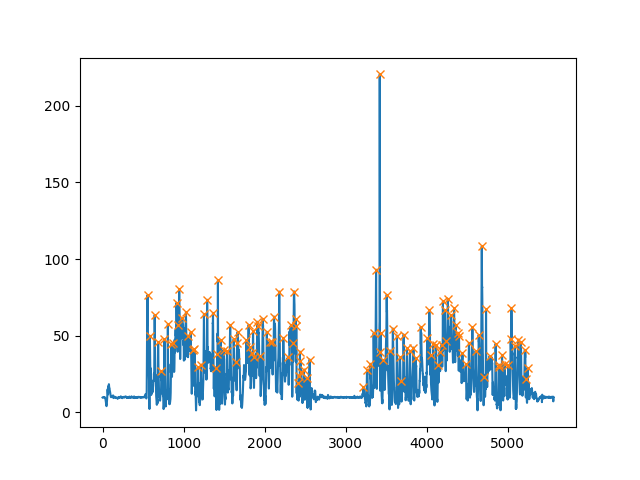

In [25]:
fig, ax = plt.subplots()
peaks, _ = find_peaks(accel_length,prominence=(10,None))
ax.plot(accel_length)
ax.plot(peaks, np.array(accel_length)[peaks], "x")
plt.show()

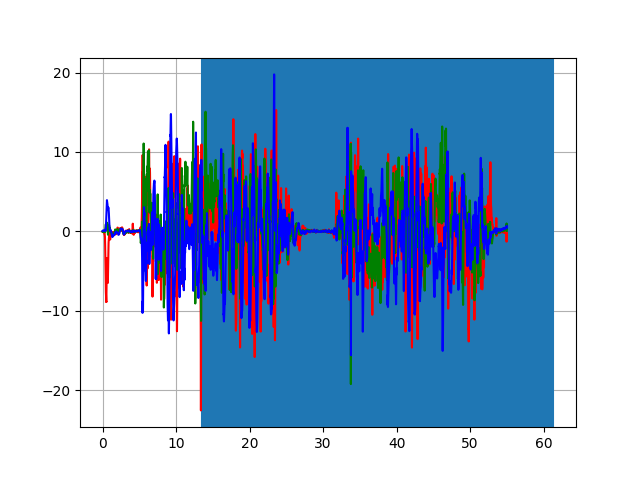

In [26]:
fig, ax = plt.subplots()
for x in beat.iloc[:,0]:
    seconds = x / sample_rate
    if (min_seconds <= seconds <= max_seconds):
        plt.axvline(seconds)
ax.plot(gyro_time[min_sample*2:max_sample*2],gyro.iloc[min_sample*2:max_sample*2,1],color = 'r')
ax.plot(gyro_time[min_sample*2:max_sample*2],gyro.iloc[min_sample*2:max_sample*2,2],color = 'g')
ax.plot(gyro_time[min_sample*2:max_sample*2],gyro.iloc[min_sample*2:max_sample*2,3],color = 'b')
ax.grid(True)
plt.show()
